In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
%pip install bertopic
%pip install germansentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 842.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from bertopic import BERTopic
from germansentiment import SentimentModel

from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#topic_model = BERTopic.load('gdrive/MyDrive/mathesis/topic_model_bertopic_2018')

In [6]:
df = pd.read_pickle('gdrive/MyDrive/mathesis/df_ml_ready_2018.pkl')

In [7]:
topic_df = pd.read_pickle('gdrive/MyDrive/mathesis/df_topic_2018.pkl')

In [8]:
test_set = pd.read_pickle('gdrive/MyDrive/mathesis/sent_testset_balanced_2018.pkl')

In [9]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462041 entries, 0 to 1462040
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   window_id                1462041 non-null  int64         
 1   paragraph_id             1462041 non-null  int64         
 2   item_of_business         1462041 non-null  object        
 3   person_id                1222784 non-null  object        
 4   first_name               1222784 non-null  object        
 5   last_name                1222784 non-null  object        
 6   council                  1222784 non-null  object        
 7   party                    1221744 non-null  object        
 8   in_admin_role            1462041 non-null  bool          
 9   text                     1462041 non-null  object        
 10  date                     1462041 non-null  datetime64[ns]
 11  session_title            1462041 non-null  object        
 12  

In [10]:
sent_df = topic_df[(topic_df['person_id'].notnull()) & (topic_df['Topic'] > 0)][['window_id', 'sentences_window']].reset_index(drop=True)

In [11]:
#test_set = pd.merge(test_set, sent_df, how='inner', on='window_id')

In [12]:
test_set

,window_id,sentences_window,true_sentiment
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0
...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0


In [13]:
docs = list(test_set['sentences_window'])

In [14]:
model = SentimentModel()

In [15]:
BATCH_SIZE = 50
probabilities = []
for i in tqdm(range(0, len(docs), BATCH_SIZE)):
  probabilities += model.predict_sentiment(docs[i:i + BATCH_SIZE], output_probabilities = True)[1]

100%|██████████| 2/2 [00:03<00:00,  1.94s/it]


In [16]:
probabilities[:5]

[[['positive', 0.0015046991175040603],
  ['negative', 0.003632541047409177],
  ['neutral', 0.9948627352714539]],
 [['positive', 0.0005650603561662138],
  ['negative', 0.0008930586627684534],
  ['neutral', 0.9985419511795044]],
 [['positive', 0.003079660702496767],
  ['negative', 0.9839649200439453],
  ['neutral', 0.01295546069741249]],
 [['positive', 0.0023344154469668865],
  ['negative', 0.013770819641649723],
  ['neutral', 0.9838947653770447]],
 [['positive', 0.00021722599922213703],
  ['negative', 0.0005196752608753741],
  ['neutral', 0.9992629885673523]]]

In [17]:
single_probs = []
for i in probabilities:
  single_probs.append(i[0][1] - i[1][1])
single_probs[:5]

[-0.0021278419299051166,
 -0.0003279983066022396,
 -0.9808852593414485,
 -0.011436404194682837,
 -0.00030244926165323704]

In [18]:
test_set['sentiment'] = single_probs

In [19]:
prob_positive = []
for i in probabilities:
  prob_positive.append(i[0][1])
test_set['prob_positive'] = prob_positive

In [20]:
prob_negative = []
for i in probabilities:
  prob_negative.append(i[1][1])
test_set['prob_negative'] = prob_negative

In [21]:
prob_neutral = []
for i in probabilities:
  prob_neutral.append(i[2][1])
test_set['prob_neutral'] = prob_neutral

In [22]:
model2 = SentimentModel('mdraw/german-news-sentiment-bert')

In [23]:
BATCH_SIZE = 50
probabilities2 = []
for i in tqdm(range(0, len(docs), BATCH_SIZE)):
  probabilities2 += model2.predict_sentiment(docs[i:i + BATCH_SIZE], output_probabilities = True)[1]

100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


In [24]:
prob_positive = []
for i in probabilities2:
  prob_positive.append(i[0][1])
test_set['prob_positive2'] = prob_positive
prob_negative = []
for i in probabilities2:
  prob_negative.append(i[1][1])
test_set['prob_negative2'] = prob_negative
prob_neutral = []
for i in probabilities2:
  prob_neutral.append(i[2][1])
test_set['prob_neutral2'] = prob_neutral

In [25]:
test_set

,window_id,sentences_window,true_sentiment,sentiment,prob_positive,prob_negative,prob_neutral,prob_positive2,prob_negative2,prob_neutral2
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0,-0.002128,0.001505,0.003633,0.994863,0.263277,0.159242,0.577481
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0,-0.000328,0.000565,0.000893,0.998542,0.271307,0.146497,0.582196
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0,-0.980885,0.003080,0.983965,0.012955,0.006845,0.959452,0.033702
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0,-0.011436,0.002334,0.013771,0.983895,0.026360,0.741949,0.231691
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,-0.000302,0.000217,0.000520,0.999263,0.182231,0.268127,0.549642
...,...,...,...,...,...,...,...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0,-0.809500,0.021737,0.831237,0.147026,0.208226,0.318559,0.473215
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0,-0.035098,0.006341,0.041439,0.952219,0.042194,0.688121,0.269685
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0,0.566513,0.583551,0.017038,0.399411,0.989292,0.008563,0.002144
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0,-0.000423,0.002267,0.002690,0.995043,0.883651,0.037794,0.078555


<Axes: >

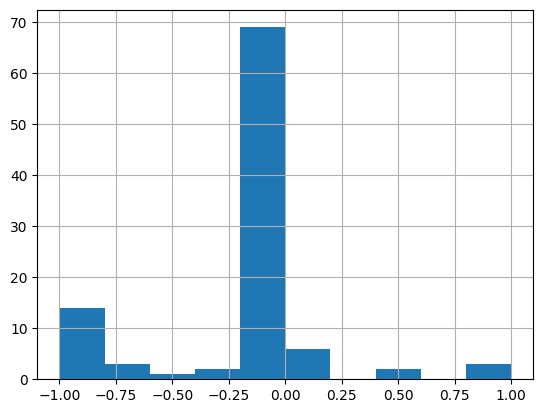

In [26]:
test_set['sentiment'].hist()

In [27]:
test_set['sentiment'].describe()

count    100.000000
mean      -0.127667
std        0.406014
min       -0.997503
25%       -0.028564
50%       -0.001336
75%       -0.000015
max        0.997951
Name: sentiment, dtype: float64

In [28]:
#sent_df.to_pickle('gdrive/MyDrive/mathesis/df_sent_2018.pkl')

## Model evaluation

In [29]:
#test_set = pd.read_pickle('gdrive/MyDrive/mathesis/sent_testset_balanced_2018.pkl')

In [30]:
#test_set

In [31]:
#test_set = pd.merge(test_set, sent_df, how='inner', on='window_id')

In [32]:
test_set

,window_id,sentences_window,true_sentiment,sentiment,prob_positive,prob_negative,prob_neutral,prob_positive2,prob_negative2,prob_neutral2
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0,-0.002128,0.001505,0.003633,0.994863,0.263277,0.159242,0.577481
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0,-0.000328,0.000565,0.000893,0.998542,0.271307,0.146497,0.582196
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0,-0.980885,0.003080,0.983965,0.012955,0.006845,0.959452,0.033702
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0,-0.011436,0.002334,0.013771,0.983895,0.026360,0.741949,0.231691
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,-0.000302,0.000217,0.000520,0.999263,0.182231,0.268127,0.549642
...,...,...,...,...,...,...,...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0,-0.809500,0.021737,0.831237,0.147026,0.208226,0.318559,0.473215
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0,-0.035098,0.006341,0.041439,0.952219,0.042194,0.688121,0.269685
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0,0.566513,0.583551,0.017038,0.399411,0.989292,0.008563,0.002144
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0,-0.000423,0.002267,0.002690,0.995043,0.883651,0.037794,0.078555


In [33]:
test_set['error'] = abs(test_set['true_sentiment'] - test_set['sentiment'])
test_set['error_sq'] = (test_set['true_sentiment'] - test_set['sentiment'])**2

In [34]:
test_set

,window_id,sentences_window,true_sentiment,sentiment,prob_positive,prob_negative,prob_neutral,prob_positive2,prob_negative2,prob_neutral2,error,error_sq
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0,-0.002128,0.001505,0.003633,0.994863,0.263277,0.159242,0.577481,0.997872,0.995749
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0,-0.000328,0.000565,0.000893,0.998542,0.271307,0.146497,0.582196,0.999672,0.999344
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0,-0.980885,0.003080,0.983965,0.012955,0.006845,0.959452,0.033702,0.019115,0.000365
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0,-0.011436,0.002334,0.013771,0.983895,0.026360,0.741949,0.231691,0.988564,0.977258
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,-0.000302,0.000217,0.000520,0.999263,0.182231,0.268127,0.549642,0.999698,0.999395
...,...,...,...,...,...,...,...,...,...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0,-0.809500,0.021737,0.831237,0.147026,0.208226,0.318559,0.473215,1.809500,3.274289
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0,-0.035098,0.006341,0.041439,0.952219,0.042194,0.688121,0.269685,1.035098,1.071427
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0,0.566513,0.583551,0.017038,0.399411,0.989292,0.008563,0.002144,0.433487,0.187911
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0,-0.000423,0.002267,0.002690,0.995043,0.883651,0.037794,0.078555,1.000423,1.000847


### Mean absolute error

In [35]:
test_set['error'].mean()

0.550087935197098

### Mean squared error

In [36]:
test_set['error_sq'].mean()

0.4813931338323932

In [37]:
test_set.sort_values(by='error', ascending=False)

,window_id,sentences_window,true_sentiment,sentiment,prob_positive,prob_negative,prob_neutral,prob_positive2,prob_negative2,prob_neutral2,error,error_sq
14221,248404,Ich kann es relativ kurz machen: Die SVP wird ...,1.0,-0.898397,0.008511,0.906908,0.084581,0.018014,0.843034,0.138952,1.898397,3.603911e+00
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0,-0.809500,0.021737,0.831237,0.147026,0.208226,0.318559,0.473215,1.809500,3.274289e+00
14668,257832,Dann bin ich natürlich auch froh um das Votum ...,1.0,-0.352458,0.065652,0.418109,0.516239,0.067298,0.669570,0.263133,1.352458,1.829142e+00
15762,276968,Den Bauern gibt man einfach ein wenig mehr Sub...,0.5,-0.661069,0.077704,0.738773,0.183523,0.264894,0.266037,0.469069,1.161069,1.348081e+00
7030,133418,Im Namen der EVP-Fraktion kann ich Ihnen mitte...,1.0,-0.038806,0.018396,0.057202,0.924402,0.504836,0.145151,0.350013,1.038806,1.079118e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
15844,277136,Sie ist nicht nur ein Pharmaland. Doch eben ha...,0.0,-0.000015,0.000021,0.000036,0.999944,0.377941,0.083764,0.538295,0.000015,2.219077e-10
9796,172659,In medizinischer Hinsicht hat sich einiges get...,0.0,-0.000007,0.000011,0.000018,0.999971,0.601680,0.064657,0.333664,0.000007,5.484332e-11
10340,183413,Steht der neue Artikel in der Kantonsverfassun...,0.0,-0.000002,0.000010,0.000012,0.999978,0.169608,0.032021,0.798371,0.000002,4.701604e-12
12953,223983,Fassen wir zusammen: Beim Ausbau von Solarener...,0.0,0.000002,0.000011,0.000009,0.999980,0.218381,0.040428,0.741191,0.000002,2.469465e-12


In [38]:
test_set['sentiment*2'] = test_set['sentiment']*2
test_set['sentiment_cat'] = test_set['sentiment*2'].round() / 2

In [39]:
test_set

,window_id,sentences_window,true_sentiment,sentiment,prob_positive,prob_negative,prob_neutral,prob_positive2,prob_negative2,prob_neutral2,error,error_sq,sentiment*2,sentiment_cat
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0,-0.002128,0.001505,0.003633,0.994863,0.263277,0.159242,0.577481,0.997872,0.995749,-0.004256,-0.0
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0,-0.000328,0.000565,0.000893,0.998542,0.271307,0.146497,0.582196,0.999672,0.999344,-0.000656,-0.0
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0,-0.980885,0.003080,0.983965,0.012955,0.006845,0.959452,0.033702,0.019115,0.000365,-1.961771,-1.0
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0,-0.011436,0.002334,0.013771,0.983895,0.026360,0.741949,0.231691,0.988564,0.977258,-0.022873,-0.0
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,-0.000302,0.000217,0.000520,0.999263,0.182231,0.268127,0.549642,0.999698,0.999395,-0.000605,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0,-0.809500,0.021737,0.831237,0.147026,0.208226,0.318559,0.473215,1.809500,3.274289,-1.619000,-1.0
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0,-0.035098,0.006341,0.041439,0.952219,0.042194,0.688121,0.269685,1.035098,1.071427,-0.070196,-0.0
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0,0.566513,0.583551,0.017038,0.399411,0.989292,0.008563,0.002144,0.433487,0.187911,1.133026,0.5
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0,-0.000423,0.002267,0.002690,0.995043,0.883651,0.037794,0.078555,1.000423,1.000847,-0.000847,-0.0


In [40]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [41]:
confusion_matrix(test_set, 'true_sentiment', 'sentiment_cat')

sentiment_cat,-1.0,-0.5,-0.0,0.5,1.0
true_sentiment,,,,,
-1.0,6,1,13,0,0
-0.5,7,1,12,0,0
0.0,0,0,19,0,1
0.5,0,2,17,0,1
1.0,2,1,14,2,1


In [42]:
test_set['true_sentiment_3'] = np.where(test_set['true_sentiment'] % 1 == 0.5, test_set['true_sentiment'] * 2, test_set['true_sentiment'])
test_set['sentiment_cat_3'] = np.where(test_set['sentiment_cat'] % 1 == 0.5, test_set['sentiment_cat'] * 2, test_set['sentiment_cat'])

In [43]:
test_set

,window_id,sentences_window,true_sentiment,sentiment,prob_positive,prob_negative,prob_neutral,prob_positive2,prob_negative2,prob_neutral2,error,error_sq,sentiment*2,sentiment_cat,true_sentiment_3,sentiment_cat_3
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0,-0.002128,0.001505,0.003633,0.994863,0.263277,0.159242,0.577481,0.997872,0.995749,-0.004256,-0.0,-1.0,-0.0
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0,-0.000328,0.000565,0.000893,0.998542,0.271307,0.146497,0.582196,0.999672,0.999344,-0.000656,-0.0,-1.0,-0.0
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0,-0.980885,0.003080,0.983965,0.012955,0.006845,0.959452,0.033702,0.019115,0.000365,-1.961771,-1.0,-1.0,-1.0
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0,-0.011436,0.002334,0.013771,0.983895,0.026360,0.741949,0.231691,0.988564,0.977258,-0.022873,-0.0,-1.0,-0.0
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,-0.000302,0.000217,0.000520,0.999263,0.182231,0.268127,0.549642,0.999698,0.999395,-0.000605,-0.0,-1.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0,-0.809500,0.021737,0.831237,0.147026,0.208226,0.318559,0.473215,1.809500,3.274289,-1.619000,-1.0,1.0,-1.0
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0,-0.035098,0.006341,0.041439,0.952219,0.042194,0.688121,0.269685,1.035098,1.071427,-0.070196,-0.0,1.0,-0.0
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0,0.566513,0.583551,0.017038,0.399411,0.989292,0.008563,0.002144,0.433487,0.187911,1.133026,0.5,1.0,1.0
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0,-0.000423,0.002267,0.002690,0.995043,0.883651,0.037794,0.078555,1.000423,1.000847,-0.000847,-0.0,1.0,-0.0


In [44]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1610 to 8051
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   window_id         100 non-null    int64  
 1   sentences_window  100 non-null    object 
 2   true_sentiment    100 non-null    float64
 3   sentiment         100 non-null    float64
 4   prob_positive     100 non-null    float64
 5   prob_negative     100 non-null    float64
 6   prob_neutral      100 non-null    float64
 7   prob_positive2    100 non-null    float64
 8   prob_negative2    100 non-null    float64
 9   prob_neutral2     100 non-null    float64
 10  error             100 non-null    float64
 11  error_sq          100 non-null    float64
 12  sentiment*2       100 non-null    float64
 13  sentiment_cat     100 non-null    float64
 14  true_sentiment_3  100 non-null    float64
 15  sentiment_cat_3   100 non-null    float64
dtypes: float64(14), int64(1), object(1)
memo

In [45]:
confusion_matrix(test_set, 'true_sentiment_3', 'sentiment_cat_3')

sentiment_cat_3,-1.0,-0.0,1.0
true_sentiment_3,,,
-1.0,15,25,0
0.0,0,19,1
1.0,5,31,4


In [46]:
test_set.loc[test_set['sentiment_cat']==-0.0, 'sentiment_cat'] = 0.0


In [47]:
test_set[test_set['sentiment_cat']==-0.0]['sentiment_cat']

1610     0.0
286      0.0
5906     0.0
11153    0.0
4774     0.0
        ... 
15687    0.0
4649     0.0
6307     0.0
3097     0.0
4490     0.0
Name: sentiment_cat, Length: 75, dtype: float64

In [48]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(test_set['true_sentiment_3'].astype(str))
y_onehot_true = label_binarizer.transform(test_set['true_sentiment_3'].astype(str))
y_onehot_true.shape  # (n_samples, n_classes)

(100, 3)

In [49]:
label_binarizer.classes_

array(['-1.0', '0.0', '1.0'], dtype='<U4')

In [50]:
test_set['sentiment_cat'].astype(str)

1610      0.0
286       0.0
14584    -1.0
5906      0.0
11153     0.0
         ... 
15652    -1.0
3097      0.0
13368     0.5
4490      0.0
8051      1.0
Name: sentiment_cat, Length: 100, dtype: object

In [51]:
y_onehot_pred = label_binarizer.transform(test_set['sentiment_cat'].astype(str))
y_onehot_pred.shape  # (n_samples, n_classes)

(100, 3)

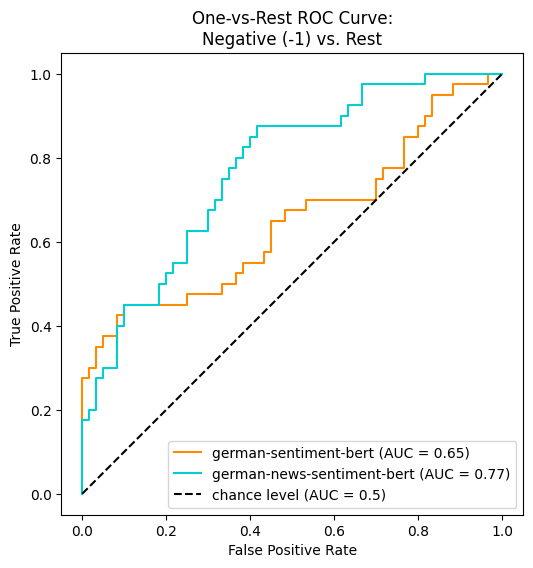

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_id = 0

fig, ax = plt.subplots(figsize=(6, 6))

RocCurveDisplay.from_predictions(
    y_onehot_true[:, class_id],
    #y_onehot_pred[:, class_id],
    test_set['prob_negative'],
    name=f"german-sentiment-bert",
    color="darkorange",
    ax=ax
)
RocCurveDisplay.from_predictions(
    y_onehot_true[:, class_id],
    #y_onehot_pred[:, class_id],
    test_set['prob_negative2'],
    name=f"german-news-sentiment-bert",
    color="darkturquoise",
    ax=ax
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curve:\nNegative (-1) vs. Rest")
plt.legend()
plt.show()

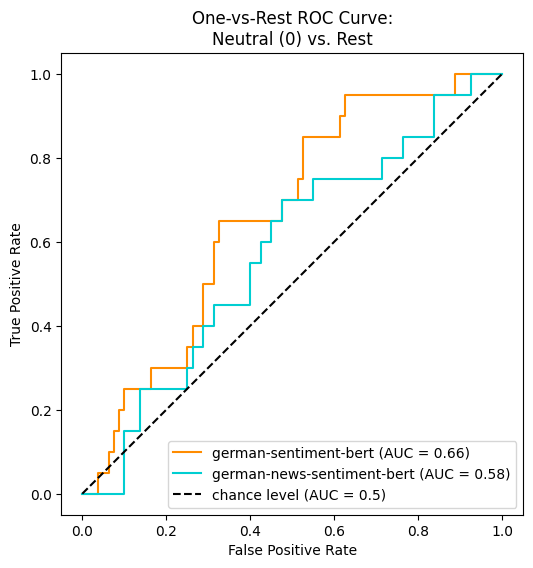

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_id = 1

fig, ax = plt.subplots(figsize=(6, 6))

RocCurveDisplay.from_predictions(
    y_onehot_true[:, class_id],
    #y_onehot_pred[:, class_id],
    test_set['prob_neutral'],
    name=f"german-sentiment-bert",
    color="darkorange",
    ax=ax
)
RocCurveDisplay.from_predictions(
    y_onehot_true[:, class_id],
    #y_onehot_pred[:, class_id],
    test_set['prob_neutral2'],
    name=f"german-news-sentiment-bert",
    color="darkturquoise",
    ax=ax
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curve:\nNeutral (0) vs. Rest")
plt.legend()
plt.show()

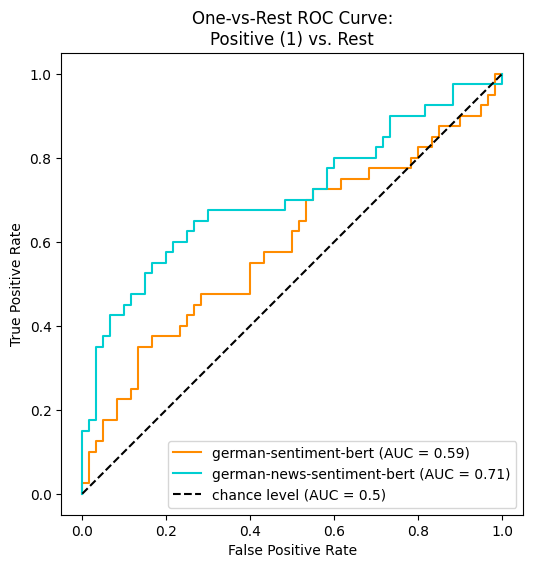

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_id = 2

fig, ax = plt.subplots(figsize=(6, 6))

RocCurveDisplay.from_predictions(
    y_onehot_true[:, class_id],
    #y_onehot_pred[:, class_id],
    test_set['prob_positive'],
    name=f"german-sentiment-bert",
    color="darkorange",
    ax=ax
)
RocCurveDisplay.from_predictions(
    y_onehot_true[:, class_id],
    #y_onehot_pred[:, class_id],
    test_set['prob_positive2'],
    name=f"german-news-sentiment-bert",
    color="darkturquoise",
    ax=ax
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curve:\nPositive (1) vs. Rest")
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_true.ravel(), test_set[["prob_negative", "prob_neutral", "prob_positive"]].to_numpy().ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.52


In [92]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr2, tpr2, roc_auc2 = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_onehot_true.ravel(), test_set[["prob_negative2", "prob_neutral2", "prob_positive2"]].to_numpy().ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc2['micro']:.4f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.6828


In [91]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_onehot_true,
    test_set[["prob_negative", "prob_neutral", "prob_positive"]].to_numpy(),
    multi_class="ovr",
    average="micro",
)
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.4f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.5214


In [72]:
np.shape(y_onehot_true.ravel())

(300,)

In [71]:
np.shape(test_set[["prob_negative", "prob_neutral", "prob_positive"]].to_numpy().ravel())

(300,)

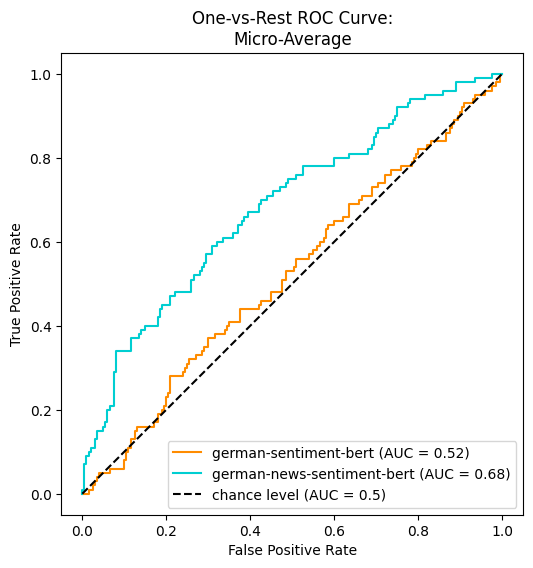

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_id = 2

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"german-sentiment-bert (AUC = {roc_auc['micro']:.2f})",
    color="darkorange",
)
plt.plot(
    fpr2["micro"],
    tpr2["micro"],
    label=f"german-news-sentiment-bert (AUC = {roc_auc2['micro']:.2f})",
    color="darkturquoise",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curve:\nMicro-Average")
plt.legend()
plt.show()

In [89]:
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_true[:, i], test_set[["prob_negative", "prob_neutral", "prob_positive"]].to_numpy()[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.6346


In [90]:
n_classes = 3
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_onehot_true[:, i], test_set[["prob_negative2", "prob_neutral2", "prob_positive2"]].to_numpy()[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

fpr_grid2 = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr2 = np.zeros_like(fpr_grid2)

for i in range(n_classes):
    mean_tpr2 += np.interp(fpr_grid2, fpr2[i], tpr2[i])  # linear interpolation

# Average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = fpr_grid2
tpr2["macro"] = mean_tpr2
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc2['macro']:.4f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.6861


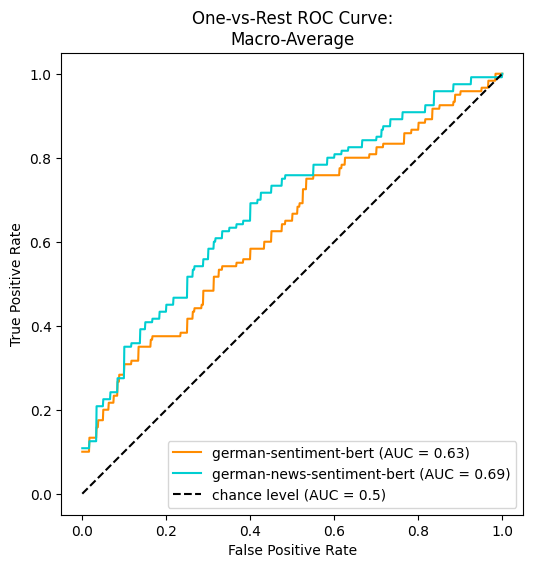

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

class_id = 2

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"german-sentiment-bert (AUC = {roc_auc['macro']:.2f})",
    color="darkorange",
)
plt.plot(
    fpr2["macro"],
    tpr2["macro"],
    label=f"german-news-sentiment-bert (AUC = {roc_auc2['macro']:.2f})",
    color="darkturquoise",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curve:\nMacro-Average")
plt.legend()
plt.show()